# Decision Tree Project

Predicting Diabetes:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Data Dictionary:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")
Source:

(a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University

In [468]:
#!pip install -r ../requirements.txt

In [469]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Step 1:

Go to the following online dataset (https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv) and download the data. Save it yor in your project's 'data/raw' folder. Time to work on it!

In [470]:
df= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
641,4,128,70,0,0,34.3,0.303,24,0
270,10,101,86,37,0,45.6,1.136,38,1
448,0,104,64,37,64,33.6,0.510,22,1
104,2,85,65,0,0,39.6,0.930,27,0
209,7,184,84,33,0,35.5,0.355,41,1


In [471]:
df.to_csv('../data/raw/raw_diabetes.csv')

## Step 2:

Use the explore.ipynb notebook to find patterns and valuable information that will help on your cleaning process.

Don't forget to write your observations.

Use the app.py to create your cleaning pipeline. Save your clean data in the 'data/processed' folder.

In [472]:
df.shape

(768, 9)

The dataset consists of 768 observations and 9 columns.

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no null values.

In [474]:
df.duplicated().any()

False

There is no duplicate data in the dataset

In [475]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [476]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Is the data balanced?**

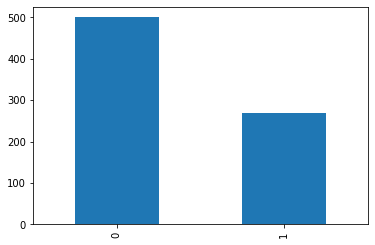

In [477]:
df['Outcome'].value_counts().plot(kind='bar')
plt.show()

The data is not balanced, there are more observations of patients with a negative result for diabetes.

**Correlation**

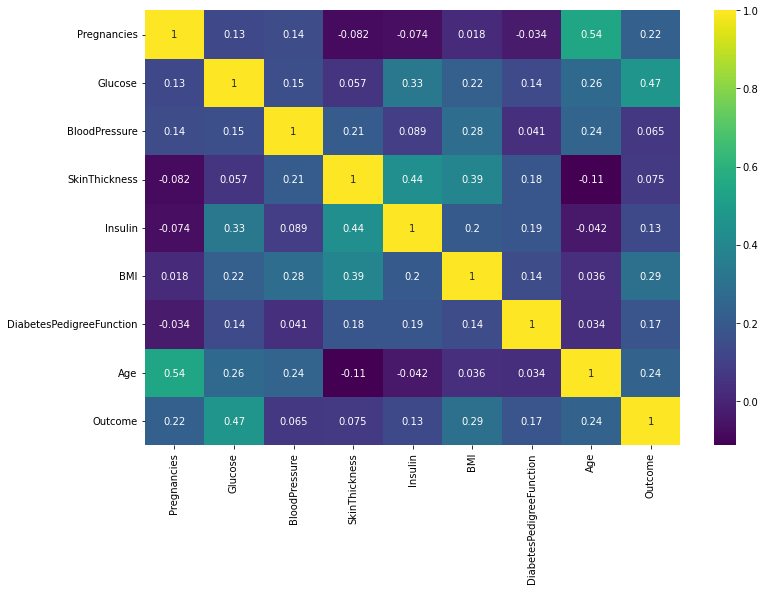

In [478]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

We can see that there is not a strong correlation between variables.

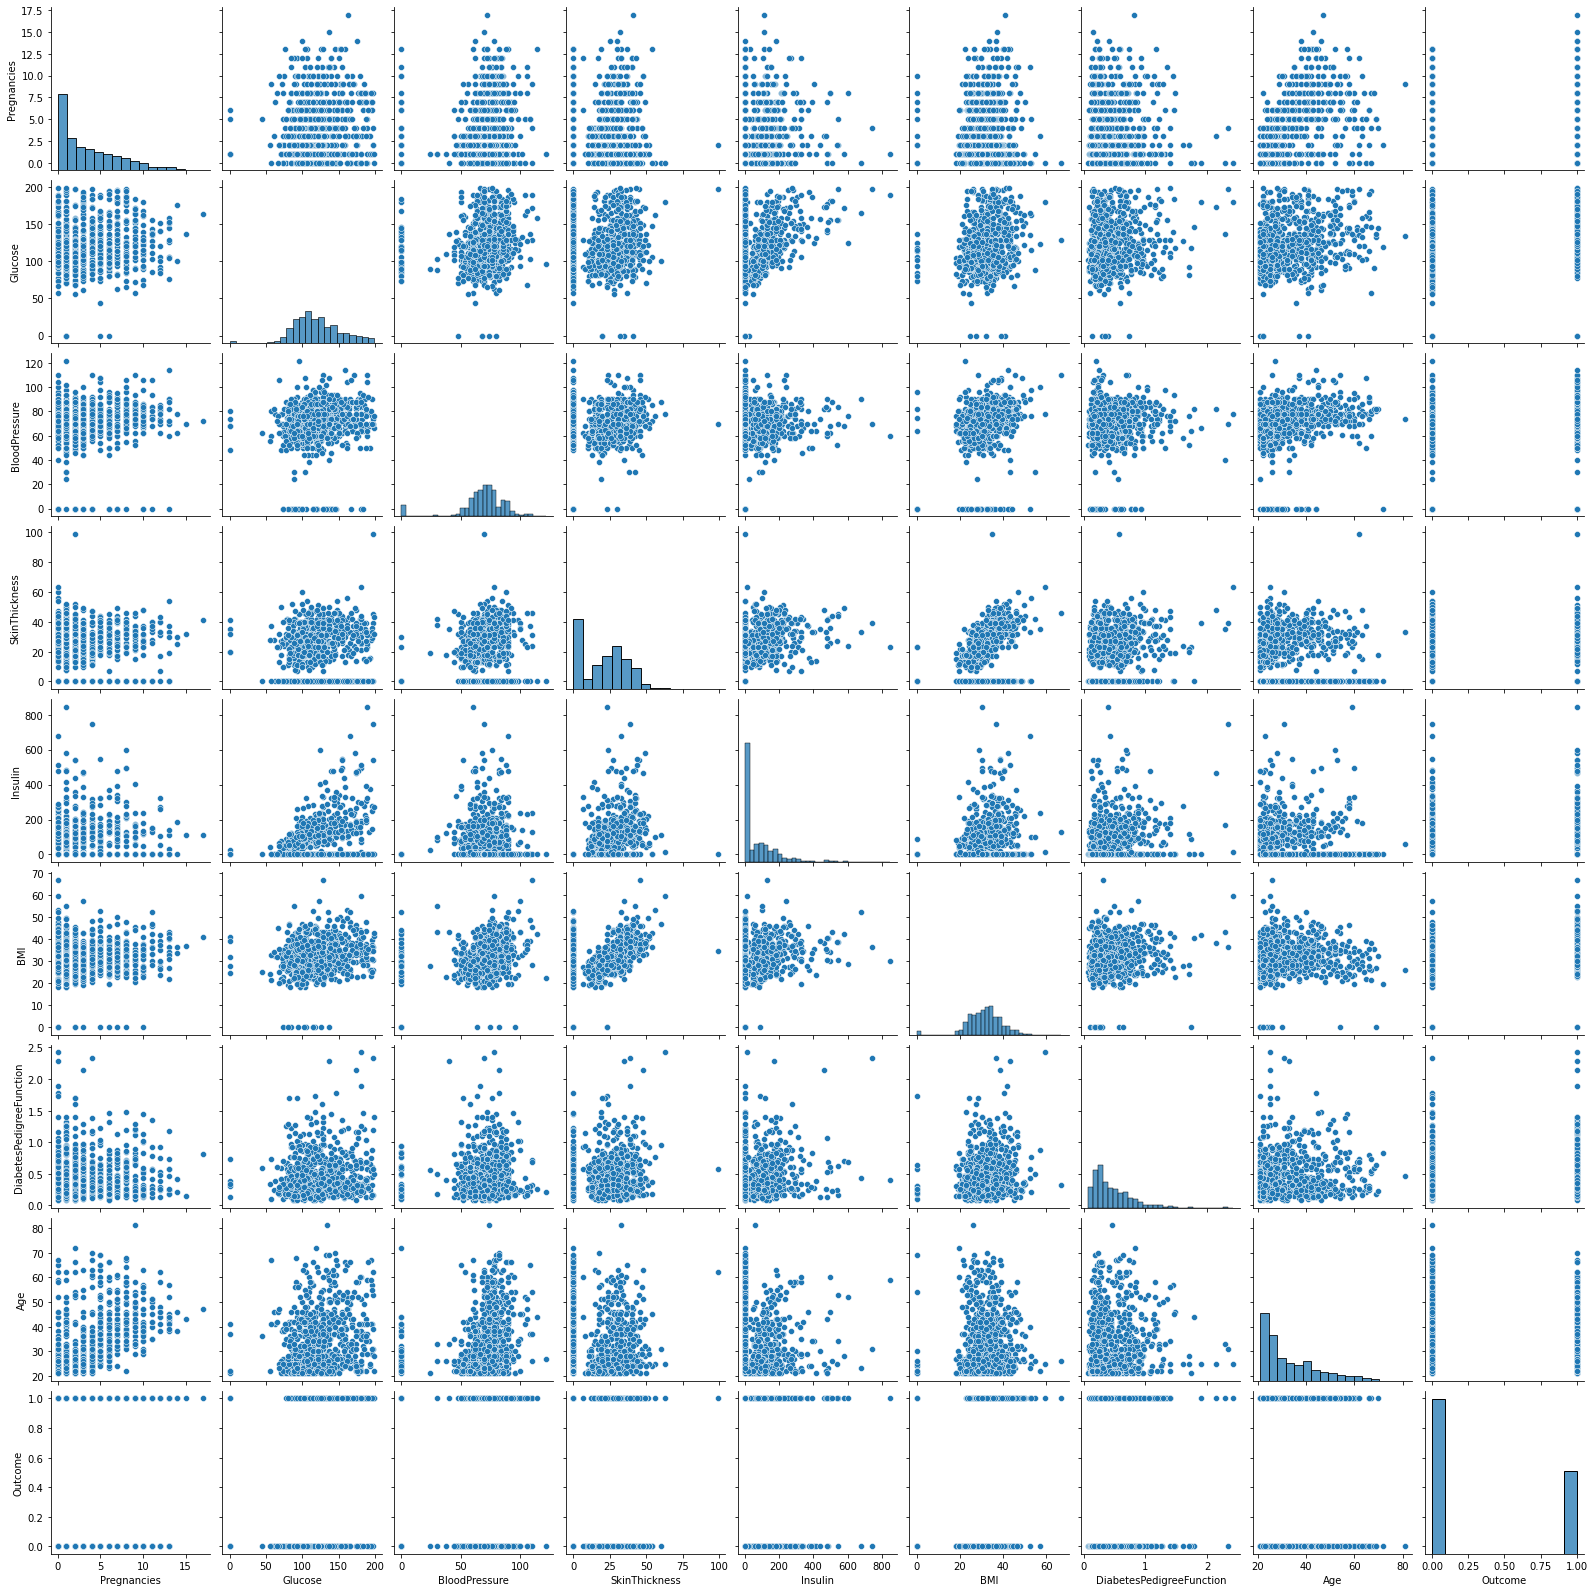

In [479]:
sns.pairplot(data=df)
plt.show()

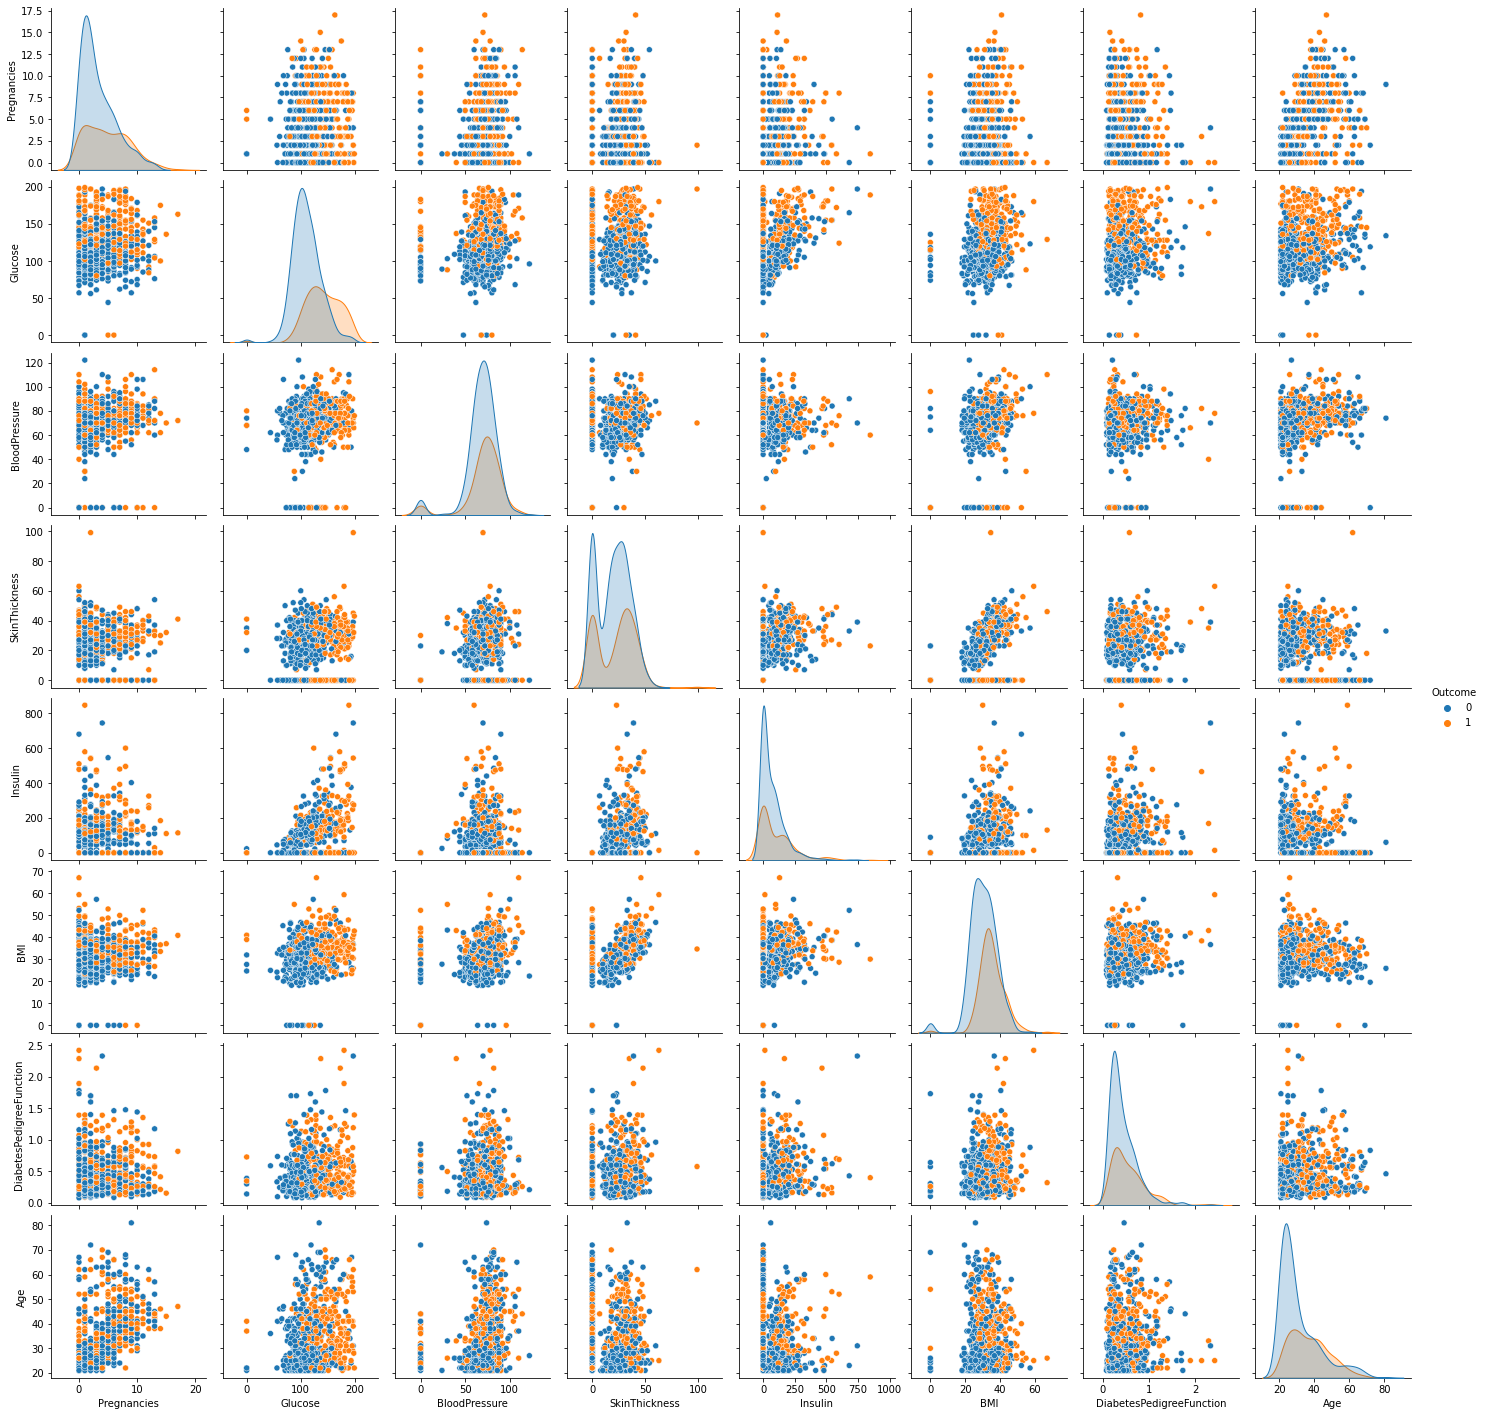

In [480]:
sns.pairplot(data=df, hue = 'Outcome')
plt.show()

In [481]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Check for outliers**

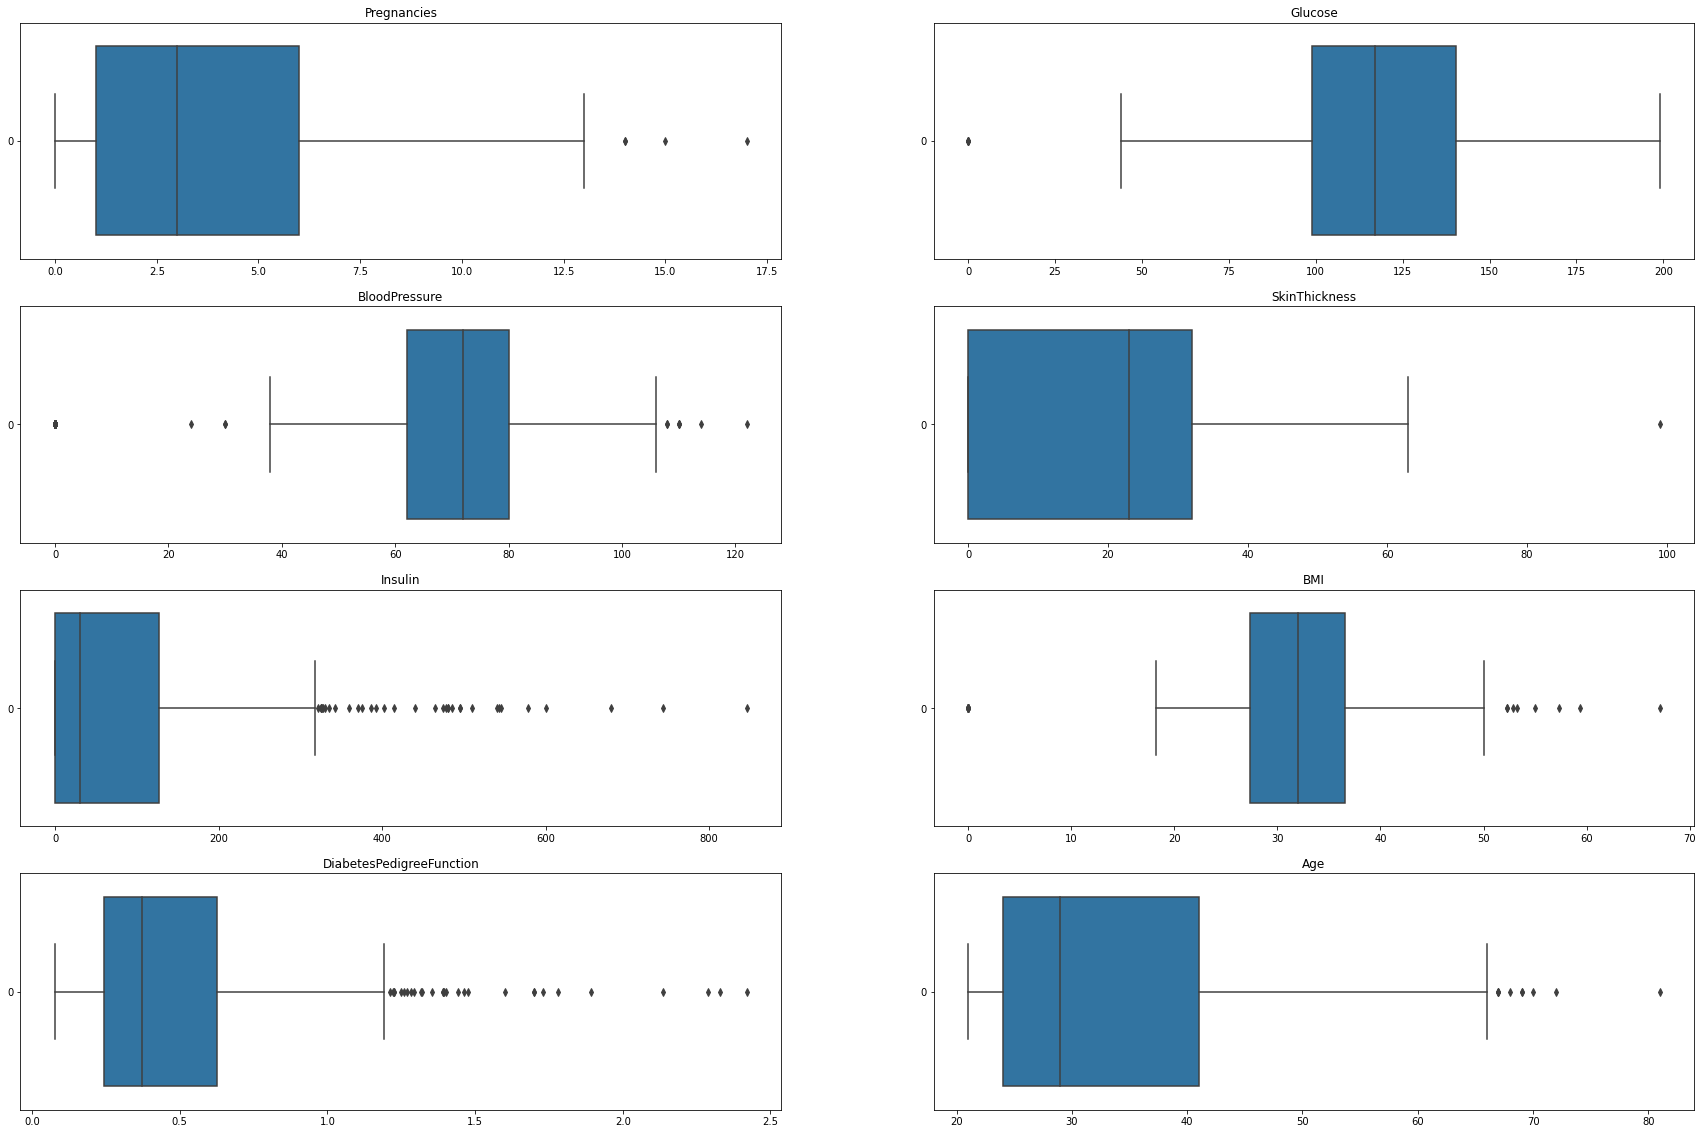

In [482]:
fig, axes = plt.subplots(4, 2, figsize=(30, 20))


sns.boxplot(ax=axes[0, 0], data = df['Pregnancies'], orient="h").set_title("Pregnancies")
sns.boxplot(ax=axes[0, 1], data = df['Glucose'], orient="h").set_title("Glucose")
sns.boxplot(ax=axes[1, 0], data = df['BloodPressure'], orient="h").set_title("BloodPressure")
sns.boxplot(ax=axes[1, 1], data = df['SkinThickness'], orient="h").set_title("SkinThickness")
sns.boxplot(ax=axes[2, 0], data = df['Insulin'], orient="h").set_title("Insulin")
sns.boxplot(ax=axes[2, 1], data = df['BMI'], orient="h").set_title("BMI")
sns.boxplot(ax=axes[3, 0], data = df['DiabetesPedigreeFunction'], orient="h").set_title("DiabetesPedigreeFunction")
sns.boxplot(ax=axes[3, 1], data = df['Age'], orient="h").set_title("Age")


plt.show()

We can identify some outliers in our data.

*_" Decision Trees are not sensitive to noisy data or outliers since, extreme values or outliers, never cause much reduction in Residual Sum of Squares(RSS), because they are never involved in the split."_*

**Balance data to prevent bias toward dominant classes**

In [483]:
from sklearn.utils import resample

df_majority = df[(df["Outcome"]==0)]
df_minority = df[(df["Outcome"]==1)]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=42)
df = pd.concat([df_minority_upsampled,df_majority])
df["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [484]:
df.to_csv('../data/processed/balanced_diabetes.csv')

## Step 3:

Now that you have a better knowledge of the data, in your exploratory notebook create a first decision tree model with your clean data.

In [485]:
X=df.drop('Outcome',axis=1)
y=df["Outcome"]

In [486]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=15)

In [487]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [488]:
model.score(X_test,y_test)

0.86

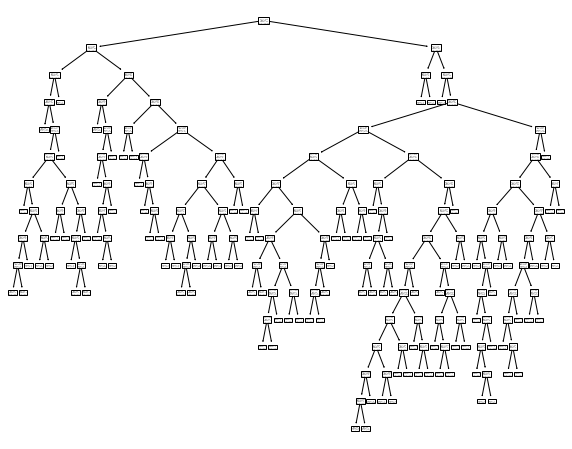

In [489]:
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(model)
plt.show()

**Make predictions**

In [490]:
pred = model.predict(X_test)

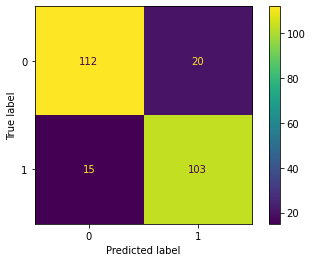

In [491]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =model.classes_)
disp.plot()


In [492]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       132
           1       0.84      0.87      0.85       118

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Step 4:

Change your decision tree to use 'entropy' as criterion.

In [493]:
model2 = DecisionTreeClassifier(random_state=0,criterion="entropy")
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [494]:
model2.score(X_test,y_test)

0.884

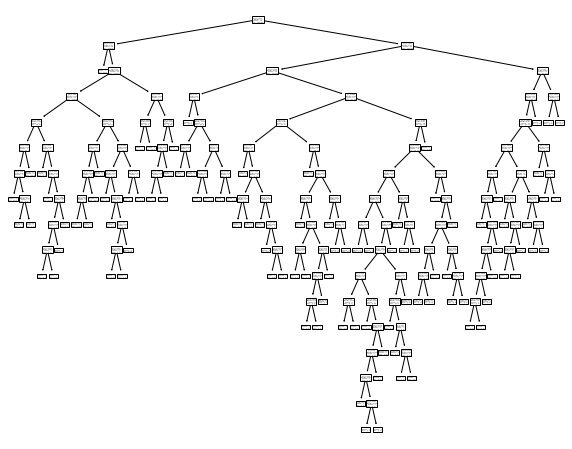

In [495]:
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(model2)
plt.show()

**Make predictions**

In [496]:
pred2 = model2.predict(X_test)

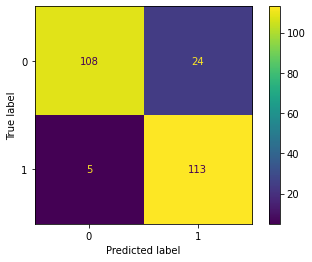

In [497]:
#Confusion matrix

cm = confusion_matrix(y_test, pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =model2.classes_)
disp.plot()


In [498]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       132
           1       0.82      0.96      0.89       118

    accuracy                           0.88       250
   macro avg       0.89      0.89      0.88       250
weighted avg       0.89      0.88      0.88       250



## Step 5:

Hypertune your model using GridSearch to find the best hyperparameters.

Train your model with the optimal hyperparameters.

In [499]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_para, cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_estimator_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 3}
DecisionTreeClassifier(max_depth=11, min_samples_split=3, random_state=0)


In [500]:
model3 = DecisionTreeClassifier(criterion="gini", max_depth=11, min_samples_split=3)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=3)

In [501]:
model3.score(X_test,y_test)

0.84

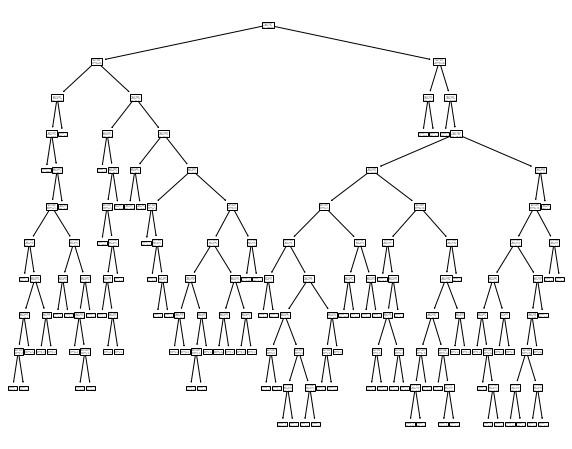

In [502]:
plt.figure(figsize=(10,8))
tree.plot_tree(model3)
plt.show()

**Make predictions**

In [503]:
pred3 = model3.predict(X_test)

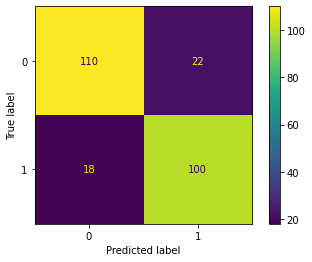

In [504]:
#Confusion matrix

cm = confusion_matrix(y_test, pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =model3.classes_)
disp.plot()

In [505]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       132
           1       0.82      0.85      0.83       118

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

